In [1]:
import math
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_dsa_limpo = pd.read_csv('df_dsa_limpo.csv')

In [3]:
df_dsa_limpo.head()

,Unnamed: 0,Bearer Id,Start,Start offset (ms),End,End Offset (ms),Dur (s),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Etapa 2 - Conversão de Tipos de Dados

In [4]:
df_dsa_limpo.dtypes

Unnamed: 0                          int64
Bearer Id                         float64
Start                              object
Start offset (ms)                 float64
End                                object
End Offset (ms)                   float64
Dur (s)                           float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    

In [5]:
df_dsa_limpo.select_dtypes(include = 'object').columns.tolist()

['Start', 'End', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [6]:
# função de converter os valores objetct para datime
def func_converter_data(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col])

In [7]:
func_converter_data(df_dsa_limpo, ['Start', 'End'])

In [8]:
strings = df_dsa_limpo.select_dtypes(include = 'object').columns.tolist()

In [9]:
# Função para converter valores object para string
def func_converter_string(df, columns):
    for col in columns:
        df[col] = df[col].astype('string')

In [10]:
func_converter_string(df_dsa_limpo, strings)

In [11]:
# Função para converter valores float para int
def func_converter_float_to_int(df, columns):
    for col in columns:
        df[col] = df[col].astype('int64')

In [12]:
int_cols = ['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI']

In [13]:
func_converter_float_to_int(df_dsa_limpo, int_cols)

In [14]:
df_dsa_limpo.dtypes

Unnamed: 0                                 int64
Bearer Id                                  int64
Start                             datetime64[ns]
Start offset (ms)                        float64
End                               datetime64[ns]
End Offset (ms)                          float64
Dur (s)                                  float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                string[python]
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)  

In [15]:
# Funcao para deletar duplicatas
def func_del_duplicatas(df):
    old = df.shape[0]
    df.drop_duplicates(inplace = True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("Nenhuma linha duplicada encontrada")
    else:
        print(f'Foi deletada {count} linhas duplicadas')

In [16]:
func_del_duplicatas(df_dsa_limpo)

Nenhuma linha duplicada encontrada


#### Existem duas colunas de duração, uma em segundos e outra em microssegundos. Vamos verificar se os valores são iguais convertendo os microssegundos em segundos.

In [17]:
# Função de conversão de unidade de tempo
def func_converte_unidade(df, columns, factor):
    for col in columns:
        df[col] = df[col] * factor

In [18]:
temp_df = df_dsa_limpo[['Dur (s)', 'Dur (ms)']]

In [19]:
func_converte_unidade(temp_df, ['Dur (ms)'], 1/1000)

In [20]:
temp_df.head()

,Dur (s),Dur (ms)
0,1823652.0,1823652.892
1,1365104.0,1365104.371
2,1361762.0,1361762.651
3,1321509.0,1321509.685
4,1089009.0,1089009.389


In [21]:
# Comparação
temp_df['Resultado_Comparacao'] = (temp_df['Dur (s)'] == temp_df['Dur (ms)'].apply(math.floor))
# Arredondando o valor para o valor inteiro mais próximo
temp_df['Dur (ms) round'] = temp_df['Dur (ms)'].apply(math.floor)

In [22]:
temp_df.head()

,Dur (s),Dur (ms),Resultado_Comparacao,Dur (ms) round
0,1823652.0,1823652.892,True,1823652
1,1365104.0,1365104.371,True,1365104
2,1361762.0,1361762.651,True,1361762
3,1321509.0,1321509.685,True,1321509
4,1089009.0,1089009.389,True,1089009


#### Deletar a Dur (s) já que é uma coluna com a mesma informação porém com dados diferentes, iremos manter a Dur (ms) já que é o nível mais baixo
#### portanto, mais preciso.

In [23]:
def func_dsa_drop_columns(df, columns):
    df.drop(columns, axis = 1, inplace = True)
    count = len(columns)
    if count == 1:
        print(f'{count} coluna foi descartada.')
    else:
        print(f'{count} colunas foram descartadas.')

In [24]:
func_dsa_drop_columns(df_dsa_limpo, ['Dur (s)'])

1 coluna foi descartada.


## Tratamento de  Outliers

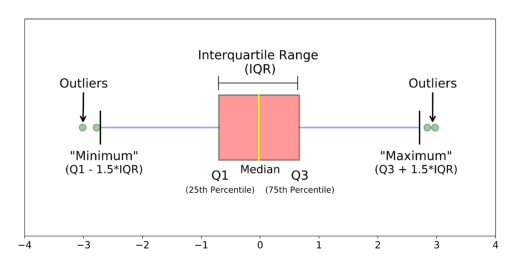

In [25]:
img_dsa = mpimg.imread('outliers.png')
plt.imshow(img_dsa)
plt.axis('off')
plt.show()

In [27]:
df_dsa_limpo.shape

(146887, 47)

In [52]:
import pandas as pd
import numpy as np

# Define a classe TrataOutlier
class TrataOutlier:

    # Construtor da classe que inicializa com um DataFrame
    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    # Função para contar outliers nas colunas especificadas
    def count_outliers(self, Q1, Q3, IQR, columns):
        
        # Define o limite de corte para considerar um valor como outlier
        cut_off = IQR * 1.5
        
        # Cria um DataFrame temporário com valores booleanos indicando outliers
        temp_df = (self.df[columns] < (Q1 - cut_off)) | (self.df[columns] > (Q3 + cut_off))
        
        # Retorna a contagem de outliers para cada coluna
        return [len(temp_df[temp_df[col] == True]) for col in temp_df]

    # Função para calcular a assimetria das colunas especificadas
    def calc_skew(self, columns=None):
        
        # Se nenhuma coluna for especificada, utiliza todas as colunas do DataFrame
        if columns == None:
            columns = self.df.columns
        
        # Retorna a medida de assimetria para cada coluna
        return [self.df[col].skew() for col in columns]

    # Função para calcular a porcentagem dos valores em relação a 146887 (número de linhas até aqui)
    def percentage(self, list):
        return [str(round(((value/146887) * 100), 2)) + '%' for value in list]

    # Função para remover outliers nas colunas especificadas
    def remove_outliers(self, columns):
        for col in columns:
            
            # Calcula os quantis Q1 e Q3
            Q1, Q3 = self.df[col].quantile(0.25), self.df[col].quantile(0.75)
            
            # Calcula a amplitude interquartil (IQR)
            IQR = Q3 - Q1
            
            # Define os limites para considerar um valor como outlier
            cut_off = IQR * 1.5
            lower, upper = Q1 - cut_off, Q3 + cut_off
            
            # Remove os valores considerados outliers
            self.df = self.df.drop(self.df[self.df[col] > upper].index)
            self.df = self.df.drop(self.df[self.df[col] < lower].index)

    # Função para substituir outliers pelos valores dos fences nas colunas especificadas
    def replace_outliers_with_fences(self, columns):
        for col in columns:
            
            # Calcula os quantis Q1 e Q3
            Q1, Q3 = self.df[col].quantile(0.25), self.df[col].quantile(0.75)
            
            # Calcula a amplitude interquartil (IQR)
            IQR = Q3 - Q1
            
            # Define os limites para considerar um valor como outlier
            cut_off = IQR * 1.5
            lower, upper = Q1 - cut_off, Q3 + cut_off
            
            # Substitui outliers pelos valores dos fences
            self.df[col] = np.where(self.df[col] > upper, upper, self.df[col])
            self.df[col] = np.where(self.df[col] < lower, lower, self.df[col])

    # Função para obter um resumo estatístico das colunas especificadas
    def getOverview(self, columns) -> None:
        
        # Calcula diversas estatísticas para as colunas
        min = self.df[columns].min()
        Q1 = self.df[columns].quantile(0.25)
        median = self.df[columns].quantile(0.5)
        Q3 = self.df[columns].quantile(0.75)
        
        max = self.df[columns].max()
        IQR = Q3 - Q1
        skew = self.calc_skew(columns)
        outliers = self.count_outliers(Q1, Q3, IQR, columns)
        cut_off = IQR * 1.5
        lower, upper = Q1 - cut_off, Q3 + cut_off
        
        # Define os nomes das colunas para o novo DataFrame
        new_columns = ['Nome de Coluna', 
                       'Min', 
                       'Q1', 
                       'Median', 
                       'Q3', 
                       'Max', 
                       'IQR', 
                       'Lower fence', 
                       'Upper fence', 
                       'Skew', 
                       'Num_Outliers', 
                       'Percent_Outliers' ]
        
        # Cria um novo DataFrame com as estatísticas calculadas
        data = zip([column for column in self.df[columns]], min, Q1, median, Q3, max, IQR, lower, upper, skew, outliers, self.percentage(outliers))
        new_df = pd.DataFrame(data = data, columns = new_columns)
        
        # Define 'Nome de Coluna' como o índice do novo DataFrame
        new_df.set_index('Nome de Coluna', inplace = True)
        
        # Retorna o novo DataFrame ordenado pelo número de outliers
        return new_df.sort_values('Num_Outliers', ascending = False).transpose()

In [53]:
trata_outlier = TrataOutlier(df_dsa_limpo)

In [54]:
lista_colunas = df_dsa_limpo.select_dtypes('float64').columns.tolist()

In [55]:
trata_outlier.getOverview(lista_colunas)

Nome de Coluna,DL TP > 1 Mbps (%),10 Kbps < UL TP < 50 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Nb of sec with Vol UL < 1250B,Nb of sec with Vol DL < 6250B,UL TP < 10 Kbps (%),TCP DL Retrans. Vol (Bytes),Avg Bearer TP UL (kbps),...,Start offset (ms),Youtube DL (Bytes),Email UL (Bytes),Email DL (Bytes),Google UL (Bytes),Google DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),End Offset (ms),Total DL (Bytes)
Min,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,...,0.0,53.0,2.0,14.0,3.0,207.0,0.0,12.0,0.0,7114041.0
Q1,0.0,0.0,0.0,15418.0,22073.0,107.0,87.0,99.0,24895.0,47.0,...,250.0,5833462.0,233439.0,892573.0,1024371.5,2882586.5,16431.0,898089.0,251.0,243073402.5
Median,0.0,0.0,0.0,39726.0,47180.0,217.0,201.0,100.0,391635.0,63.0,...,499.0,11616334.0,466357.0,1793613.0,2054793.0,5766724.0,32908.0,1793409.0,500.0,455963875.0
Q3,0.0,0.0,1.0,697298.5,611803.0,2466.5,2612.5,100.0,3078146.0,1136.0,...,749.0,17440635.5,700297.5,2689818.0,3088071.5,8625551.0,49326.5,2694640.0,750.0,665783068.0
Max,94.0,98.0,76.0,136536461.0,144911293.0,604122.0,604061.0,100.0,4294425570.0,58613.0,...,999.0,23259098.0,936418.0,3586146.0,4121357.0,11462832.0,65870.0,3586064.0,999.0,902969616.0
IQR,0.0,0.0,1.0,681880.5,589730.0,2359.5,2525.5,1.0,3053251.0,1089.0,...,499.0,11607173.5,466858.5,1797245.0,2063700.0,5742964.5,32895.5,1796551.0,499.0,422709665.5
Lower fence,0.0,0.0,-1.5,-1007402.75,-862522.0,-3432.25,-3701.25,97.5,-4554981.5,-1586.5,...,-498.5,-11577298.25,-466848.75,-1803294.5,-2071178.5,-5731860.25,-32912.25,-1796737.5,-497.5,-390991095.75
Upper fence,0.0,0.0,2.5,1720119.25,1496398.0,6005.75,6400.75,101.5,7658022.5,2769.5,...,1497.5,34851395.75,1400585.25,5385685.5,6183621.5,17239997.75,98669.75,5389466.5,1498.5,1299847566.25
Skew,5.345557,10.941071,4.503234,5.821286,7.321154,7.467915,9.009273,-8.958674,16.755094,4.473627,...,0.000823,0.000119,0.007312,-0.002659,0.002242,-0.008414,0.000258,-0.001633,-0.001251,-0.003579
Num_Outliers,36594,31509,29343,26126,25501,24870,24604,21811,21625,21104,...,0,0,0,0,0,0,0,0,0,0


In [56]:
trata_outlier.replace_outliers_with_fences(lista_colunas)